<a href="https://www.kaggle.com/code/rugvedmanoorkar/notebook7f6debb900?scriptVersionId=95025985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Problem

#### * Pneumonia can range from a mild to serious or life-threatening infection and can sometimes lead to death.
#### * Detected using X-ray imaging.
#### * Commonly misclassified as other diseases since radiographs are not particularly clear.

## Proposed Solution

#### * Machine learning models can be used to identify pneumonia in chest X-rays
#### * Intend to develop robust classifiers using Support Vector Machine (SVM) machine learning technique  to detect the presence of Pneumonia in chest X-ray images



In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats

## Dataset

#### * 5856 labelled chest X-rays
#### * 4273 X-ray images are from different subjects affected by pneumonia
#### *1583 X-ray images are labelled as not having pneumonia.
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


In [3]:
main_path='../input/chest-xray-pneumonia/chest_xray/train/'
folder_names = []
for entry_name in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/'):
    #print(entry_name)
    entry_path = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/', entry_name)
    if os.path.isdir(entry_path):
       # print(entry_path)
        folder_names.append(entry_name)
        
print('The Categories are',folder_names)
DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

The Categories are ['PNEUMONIA', 'NORMAL']
3875


## Dataset and Preprocessing

#### * High quality JPEG images with resolution of at least 1280 x 720 pixels
#### * Image -> Grayscale -> Resize 
#### * ‘1’ - pneumonia (positive) samples
#### * ‘0’- pneumonia (negative) samples


In [4]:
images = []
labels = []
normal_limit=1000
p_limit=1000
img_size=256

main_path='../input/chest-xray-pneumonia/chest_xray/train/'
folder_names = []
for entry_name in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/'):
    entry_path = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/', entry_name)
    if os.path.isdir(entry_path):
        folder_names.append(entry_name)
        
print('The Categories are',folder_names)

j=0
for folder in folder_names:
    if folder == "PNEUMONIA":
        limit= p_limit
    else:
        limit= normal_limit
    for filename in os.listdir(os.path.join(main_path,folder)):
        img_path = os.path.join(main_path,folder)
        img = cv2.imread(os.path.join(img_path,filename)) 
        if img is not None:
            img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
            img = cv2.resize(img,(img_size, img_size))
            images.append(img)
            if folder == 'NORMAL':
                labels.append(0)
                #print('normal')
            else:
                labels.append(1)
                #print('PNE')
        j=j+1
        if j >= limit:
            j=0
            break
            
images,labels=np.array(images),np.array(labels)
print(images.shape)
#print(labels)

The Categories are ['PNEUMONIA', 'NORMAL']
(2000, 256, 256)


## Feature Extraction

#### * Extract 10 features from all the images to form a feature vector for each sample: variance, mean, standard deviation, skew, kurtosis, entropy, canny edges, local binary pattern (LBP), Sobel X, and Sobel Y. [in progress]
#### * LBP : Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number
#### * Canny Edges : makes it easy to segment the image (break it up into separate objects or areas), which can then be recognised separately.
#### * Entropy : defined as corresponding states of intensity level which individual pixels can adapt. It is used in the quantitative analysis and evaluation image details, the entropy value is used as it provides better comparison of the image details


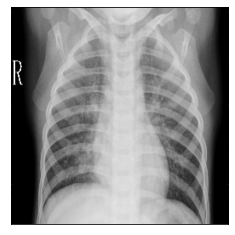

1


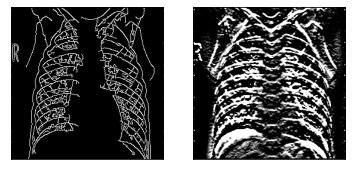

In [5]:
from random import randrange

i = randrange(limit*2)

plt.imshow(images[i],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print(labels[i])

#Canny
canny = cv2.Canny(images[i],40,200)


#Sobel
sobelY = cv2.Sobel(images[i],cv2.CV_8UC1,0,1,ksize=5)

preview = [canny,sobelY]
i=0
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(preview[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
#Obtaining Variance of images
kernel = np.ones((3,3),np.uint8)
#print(kernel)
var_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    var_vector[i] = np.var(x)
    i=i+1
print(var_vector[6])

[38808.80390619]


In [7]:
#Obtaining lbp of images
from skimage.feature import multiblock_lbp
lbp_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    lbp = multiblock_lbp(image, 0,0,28,28)
    lbp_vector[i] = lbp
    i=i+1
print(lbp_vector)

[[196.]
 [196.]
 [128.]
 ...
 [128.]
 [165.]
 [160.]]


In [8]:
#Obtaining Mean of images
mean_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    mean_vector[i] = np.mean(x)
    i=i+1
print(mean_vector[6])

[257.00392157]


In [9]:
#Obtaining Standard Deviation of images
std_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    std_vector[i] = np.std(x)
    i=i+1
print(std_vector[6])

[196.9995023]


In [10]:
skew_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    skew_vector[i] = stats.skew(x)
    i=i+1
print(skew_vector[6])

[0.23725097]


In [11]:
#Obtaining Kurtosis of images
kurto_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    kurto_vector[i] = stats.kurtosis(x)
    i=i+1
print(kurto_vector[6])
#Obtaining Entropy of images
entropy_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    entropy_vector[i] = stats.entropy(x)
    i=i+1
print(entropy_vector[6])
print(np.shape(entropy_vector))

[-0.66360991]
[5.16075635]
(2000, 1)
